In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from pandas import DataFrame
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE

client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# YOUR CODE HERE

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE

client.Accounts.get(access_token)

{'accounts': [{'account_id': 'zvmBdmM1zmCnzm7W91geIyn64wzProFoW5D9Z',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'BJRNzRlWkRfKArdmVk1nuWM57nAXvwcwnbqPq',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': '3MKVeKBxJKSmG6DK7lnAuyEpXZAledFq3DGpw',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [17]:
# YOUR CODE HERE

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

### 2. Print the categories for each transaction

In [18]:
# YOUR CODE HERE

transactions_response = client.Transactions.get(access_token, start_date,end_date)
print(json.dumps(transactions_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "xvrL3rBmKrCjxBGad958upDo9aK7PQinv3mon",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-04-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

In [19]:
income_response = client.Income.get(access_token)
print(income_response)

{'income': {'income_streams': [{'confidence': 0.99, 'days': 690, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}, 'request_id': 'PN6Vy87hmmlHNHF'}


In [20]:
transaction_category=[]
transaction_date=[]
transaction_name=[]
transaction_amount=[]

for transactions in transactions_response['transactions']:
    transaction_category.append(json.dumps(transactions['category'][0]))
    transaction_date.append(json.dumps(transactions['date']))
    transaction_name.append(json.dumps(transactions['name']))
    transaction_amount.append(json.dumps(str(transactions['amount'])))
    

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [21]:
df = pd.DataFrame([transaction_name, transaction_date, transaction_category, transaction_amount]).T
df.columns = ['Name', 'Date', 'Category', 'Amount']
df.head()

,Name,Date,Category,Amount
0,"""Tectra Inc""","""2020-04-25""","""Food and Drink""","""500"""
1,"""AUTOMATIC PAYMENT - THANK""","""2020-04-24""","""Payment""","""2078.5"""
2,"""KFC""","""2020-04-24""","""Food and Drink""","""500"""
3,"""Madison Bicycle Shop""","""2020-04-24""","""Shops""","""500"""
4,"""CREDIT CARD 3333 PAYMENT *//""","""2020-04-15""","""Payment""","""25"""


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [22]:
#Drop the quotes
df['Amount'] = df['Amount'].str.replace('"', '')
df['Name'] = df['Name'].str.replace('"', '')
df['Date'] = df['Date'].str.replace('"', '')
df['Category'] = df['Category'].str.replace('"', '')

df.head()

,Name,Date,Category,Amount
0,Tectra Inc,2020-04-25,Food and Drink,500
1,AUTOMATIC PAYMENT - THANK,2020-04-24,Payment,2078.5
2,KFC,2020-04-24,Food and Drink,500
3,Madison Bicycle Shop,2020-04-24,Shops,500
4,CREDIT CARD 3333 PAYMENT *//,2020-04-15,Payment,25


In [23]:
# datetimeindex for the date and float for the amount
df['Amount'] = df['Amount'].astype(float)
df['Date']= pd.to_datetime(df['Date'])
df.head()

,Name,Date,Category,Amount
0,Tectra Inc,2020-04-25,Food and Drink,500.0
1,AUTOMATIC PAYMENT - THANK,2020-04-24,Payment,2078.5
2,KFC,2020-04-24,Food and Drink,500.0
3,Madison Bicycle Shop,2020-04-24,Shops,500.0
4,CREDIT CARD 3333 PAYMENT *//,2020-04-15,Payment,25.0


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [24]:
print(income_response['income']['last_year_income_before_tax'])
print(income_response['income']['income_streams'][0]['monthly_income'])
print(income_response['income']['projected_yearly_income'])

7285
500
6085


# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [25]:
# YOUR CODE HERE

df.groupby('Category').sum()

,Amount
Category,
Food and Drink,3817.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


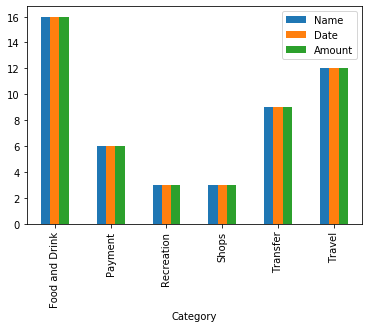

In [26]:
df.groupby('Category').count().plot(kind='bar')

### Calculate the expenses per month

In [30]:
# YOUR CODE HERE

df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')

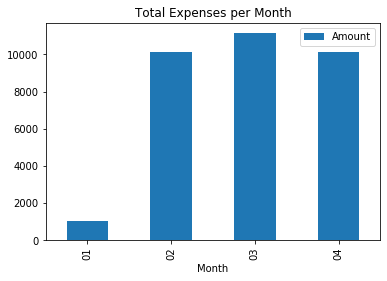

In [28]:
df.groupby('Month').sum().plot(kind='bar', title='Total Expenses per Month')